In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
import ast

In [ ]:
edu_results = pd.read_csv('/local_path/gpt4_discourse_units_identification.csv')
relation_results = pd.read_csv('/local_path/eng_dep_covdtb_test_results.csv')

# Relation Classification Results - all

In [ ]:
relation_results = pd.read_csv('/local_path/gpt_4_eng_dep_covdtb_test_results.csv')

In [ ]:
relation_results.shape

(2576, 4)

In [ ]:
print("Accuracy score = " + str(accuracy_score(relation_results['Real discourse relation'].astype(str), relation_results['ChatGPT discourse relation'].astype(str))))

Accuracy score = 0.45962732919254656


In [ ]:
# Calculate F1 score
f1 = f1_score(relation_results['Real discourse relation'].astype(str),  relation_results['ChatGPT discourse relation'].astype(str), average='macro')
print("F1 score = " + str(f1))

F1 score = 0.21550606619062018


In [ ]:
all_relations = relation_results['Real discourse relation'].unique()
for rel in all_relations:
  filtered_df = relation_results[relation_results['Real discourse relation'] == rel]
  print("Accuracy score for relation " + str(rel) + " = " + str(accuracy_score(filtered_df['Real discourse relation'].astype(str), filtered_df['ChatGPT discourse relation'].astype(str))))

Accuracy score for relation elaboration = 0.5843653250773994
Accuracy score for relation findings = 0.026143790849673203
Accuracy score for relation joint = 0.3988439306358382
Accuracy score for relation attribution = 0.09803921568627451
Accuracy score for relation manner-means = 0.6347826086956522
Accuracy score for relation enablement = 0.13122171945701358
Accuracy score for relation cause-result = 0.7611940298507462
Accuracy score for relation background = 0.5263157894736842
Accuracy score for relation comparison = 0.3137254901960784
Accuracy score for relation textual-organization = 0.03636363636363636
Accuracy score for relation temporal = 0.3333333333333333
Accuracy score for relation condition = 0.6666666666666666


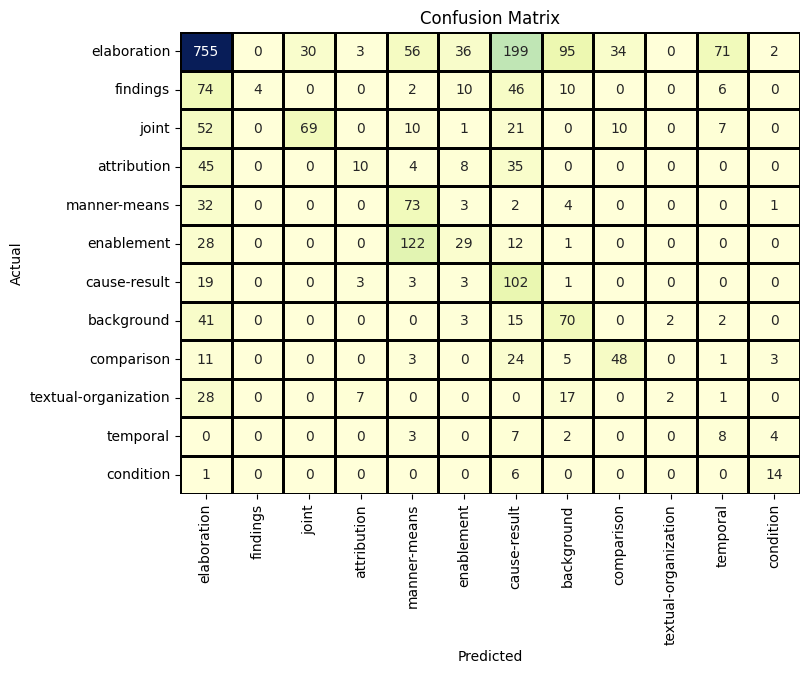

In [ ]:
conf_matrix = confusion_matrix(relation_results["Real discourse relation"].astype(str), relation_results["ChatGPT discourse relation"].astype(str), labels=all_relations)
confusion_df = pd.DataFrame(conf_matrix, index=all_relations, columns=all_relations)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor="black", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

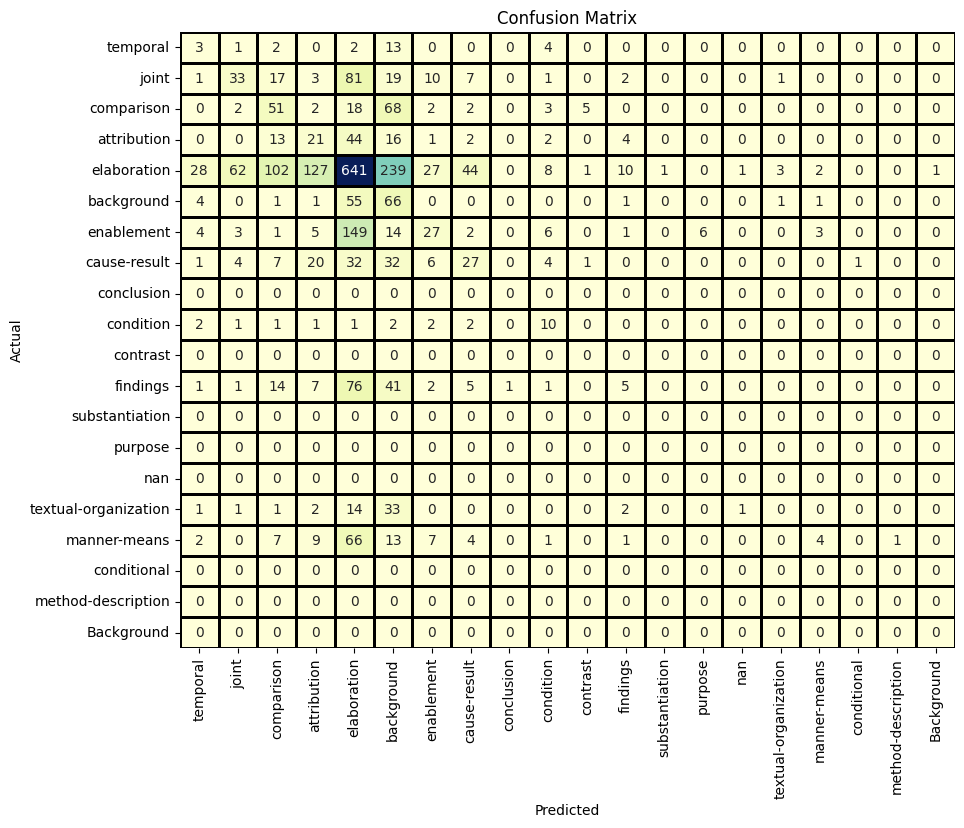

In [ ]:
chatgpt_relations = relation_results["ChatGPT discourse relation"].astype(str).unique()
conf_matrix = confusion_matrix(relation_results["Real discourse relation"].astype(str), relation_results["ChatGPT discourse relation"].astype(str), labels=chatgpt_relations)
confusion_df = pd.DataFrame(conf_matrix, index=chatgpt_relations, columns=chatgpt_relations)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor="black", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Relation classification results - only elaboration

In [ ]:
relation_results_only_elaboration = pd.read_csv('/local_path/gpt4_eng_dep_covdtb_test_results_only_elaboration.csv')
relation_results_only_elaboration.shape

(2586, 5)

In [ ]:
relation_results_only_elaboration.columns

Index(['EDU_1', 'EDU_2', 'Real discourse relation',
       'ChatGPT discourse relation', 'Second guess'],
      dtype='object')

In [ ]:
for i in range(len(relation_results_only_elaboration)):
  if relation_results_only_elaboration.iloc[i]['Real discourse relation'] != 'elaboration':
    relation_results_only_elaboration.loc[i,'Real discourse relation'] = 'None'
print("Accuracy score = " + str(accuracy_score(relation_results_only_elaboration['Real discourse relation'].astype(str), relation_results_only_elaboration['ChatGPT discourse relation'].astype(str))))

Accuracy score = 0.5061871616395979


In [ ]:
# Calculate F1 score
f1 = f1_score(relation_results_only_elaboration['Real discourse relation'].astype(str),  relation_results_only_elaboration['ChatGPT discourse relation'].astype(str), average='macro')
print("F1 score = " + str(f1))

F1 score = 0.24917783169001062


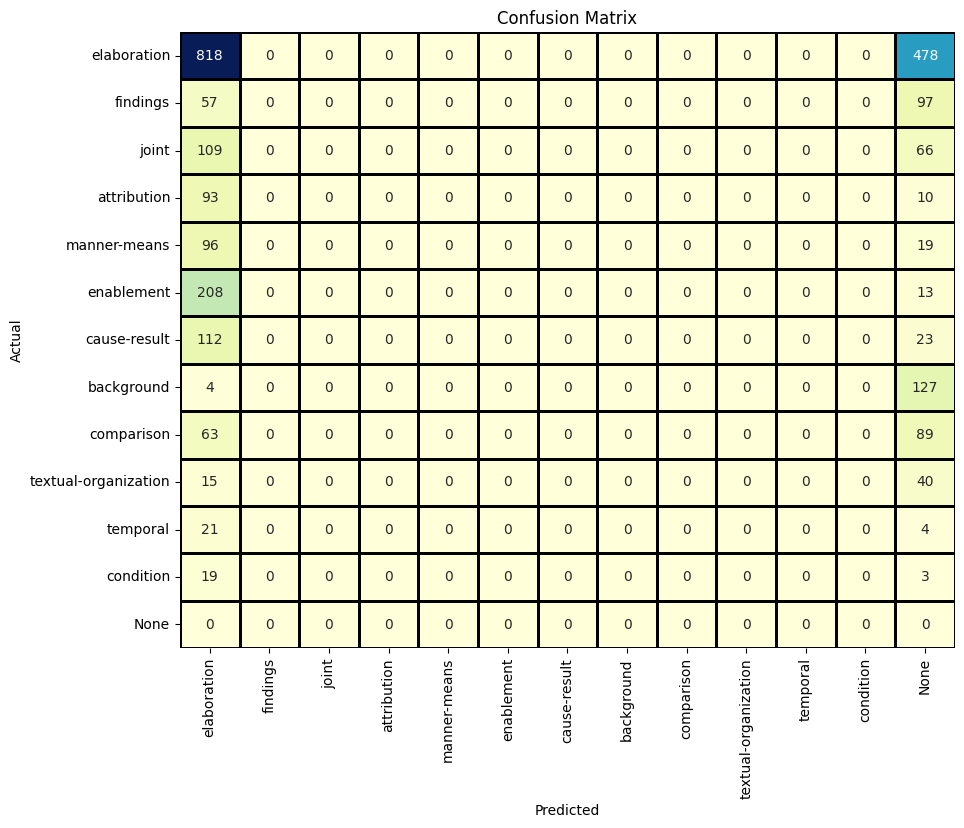

In [ ]:
chatgpt_relations = np.hstack((relation_results_only_elaboration["Real discourse relation"].astype(str).unique(), ['None']))
# chatgpt_relations[len(chatgpt_relations)] = 'None'
conf_matrix = confusion_matrix(relation_results_only_elaboration["Real discourse relation"].astype(str), relation_results_only_elaboration["ChatGPT discourse relation"].astype(str), labels=chatgpt_relations)
confusion_df = pd.DataFrame(conf_matrix, index=chatgpt_relations, columns=chatgpt_relations)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor="black", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Relation classification results - elaboration excluded

In [ ]:
relation_results_elaboration_excluded = pd.read_csv('/local_path/gpt4_eng_dep_covdtb_test_results_elaboration_excluded.csv')

In [ ]:
print("Accuracy score = " + str(accuracy_score(relation_results_elaboration_excluded['Real discourse relation'].astype(str), relation_results_elaboration_excluded['ChatGPT discourse relation'].astype(str))))

Accuracy score = 0.4553917765709853


In [ ]:
# Calculate F1 score
f1 = f1_score(relation_results_elaboration_excluded['Real discourse relation'].astype(str),  relation_results_elaboration_excluded['ChatGPT discourse relation'].astype(str), average='macro')
print("F1 score = " + str(f1))

F1 score = 0.3188056592379632


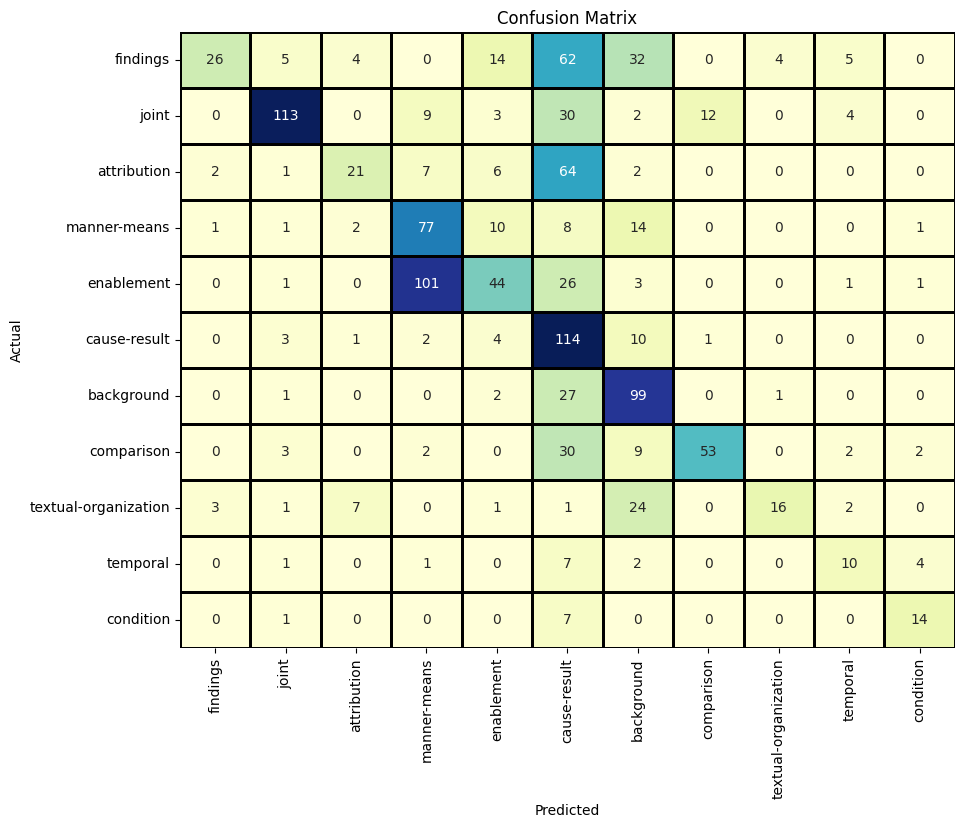

In [ ]:
chatgpt_relations = relation_results_elaboration_excluded["Real discourse relation"].astype(str).unique()
conf_matrix = confusion_matrix(relation_results_elaboration_excluded["Real discourse relation"].astype(str), relation_results_elaboration_excluded["ChatGPT discourse relation"].astype(str), labels=chatgpt_relations)
confusion_df = pd.DataFrame(conf_matrix, index=chatgpt_relations, columns=chatgpt_relations)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor="black", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

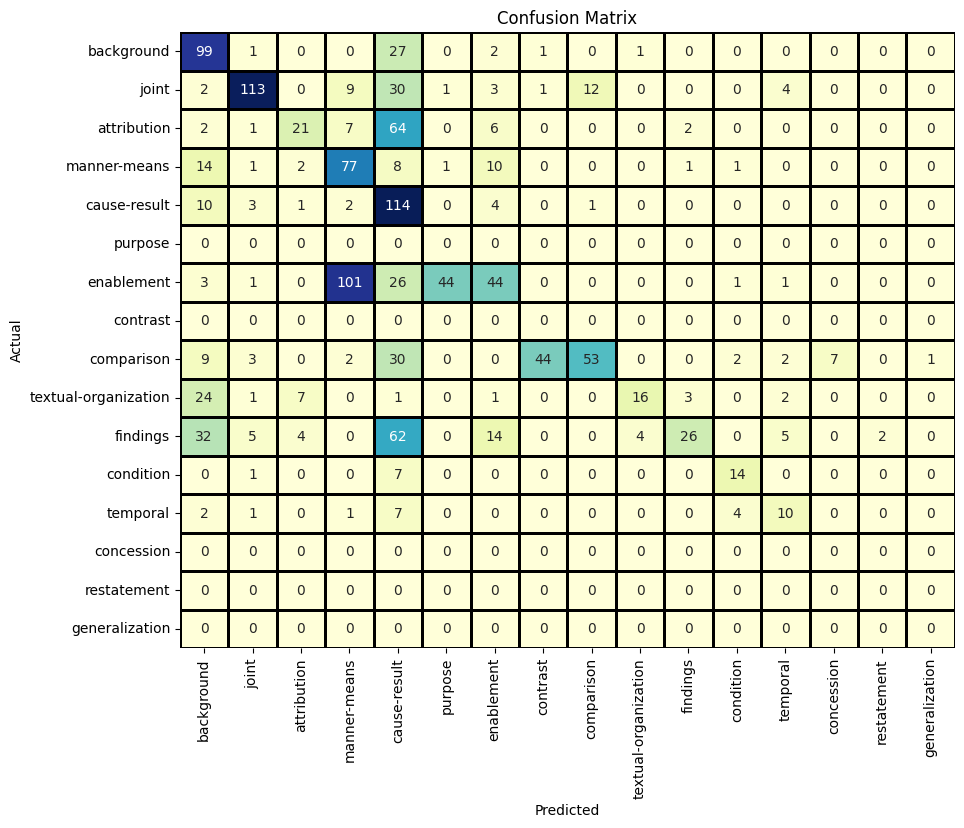

In [ ]:
chatgpt_relations = relation_results_elaboration_excluded["ChatGPT discourse relation"].astype(str).unique()
conf_matrix = confusion_matrix(relation_results_elaboration_excluded["Real discourse relation"].astype(str), relation_results_elaboration_excluded["ChatGPT discourse relation"].astype(str), labels=chatgpt_relations)
confusion_df = pd.DataFrame(conf_matrix, index=chatgpt_relations, columns=chatgpt_relations)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor="black", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
relation_results_elaboration_excluded.shape

(1293, 4)

# EDU Classification Results

In [ ]:
edu_results.head(1)

,text number,real total units,chatgpt total units,chatgpt correctly segmented units,segments,correct segments
0,00c862a6402381a8541bcffe843696e059095300,771,13,10,"['In this study', 'we investigated turkey reov...","['In this study', 'we investigated turkey reov..."


In [ ]:
dataset_with_edus = pd.read_csv('/local_path/eng_dep_covdtb_edus_test.csv')

In [ ]:
# accuracy only considering the first token
def get_edu_list(ID):

  return dataset_with_edus[dataset_with_edus['Document ID'] == ID]['Document EDUs']

correct = 0
total = 0
total_gpt_segments = 0
df = edu_results
for i in range(len(df)):
  total_segments = ast.literal_eval(get_edu_list(df.iloc[i]['text number'])[i])
  chatgpt_segments = ast.literal_eval(df.iloc[i]['segments'])
  total += len(total_segments)
  total_gpt_segments += len(chatgpt_segments)

  for k in range(len(chatgpt_segments)):
    first_token = chatgpt_segments[k].split(" ")[0]

    for j in range(len(total_segments)):
      if first_token == total_segments[j].split(" ")[0]:
        correct += 1
        break

print(correct)
print(total)
print(total_gpt_segments)

1923
2951
2610


In [ ]:
correct_total_units_count = 0
for i in range(len(edu_results)):

  correctly_predicted_units = edu_results.loc[i]['chatgpt correctly segmented units']
  correct_total_units_count += correctly_predicted_units

In [ ]:
# with whole segments
print("CORRECTLY_PREDICTED/TOTAL = " + str(correct_total_units_count/total))

CORRECTLY_PREDICTED/TOTAL = 0.5703151474076584


In [ ]:
# only with first token
print("Acc = " + str(correct/total))

Acc = 0.6516435106743477
